# Project 7: Introduction to Machine Learning
- Author: Lindsay Foster
- Date: February 2025
- [Git Repository Link](https://github.com/LFoster03/datafun-07-ml)


In [2]:
# Import necessary libraries
import pandas as pd          # For data manipulation
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns       # For enhanced visualization
from sklearn.linear_model import LinearRegression  # For linear regression

# Part 1 - Chart a Straight Line

[(0, -17.77777777777778), (10, -12.222222222222223), (20, -6.666666666666667), (30, -1.1111111111111112), (40, 4.444444444444445), (50, 10.0), (60, 15.555555555555557), (70, 21.11111111111111), (80, 26.666666666666668), (90, 32.22222222222222), (100, 37.77777777777778)]


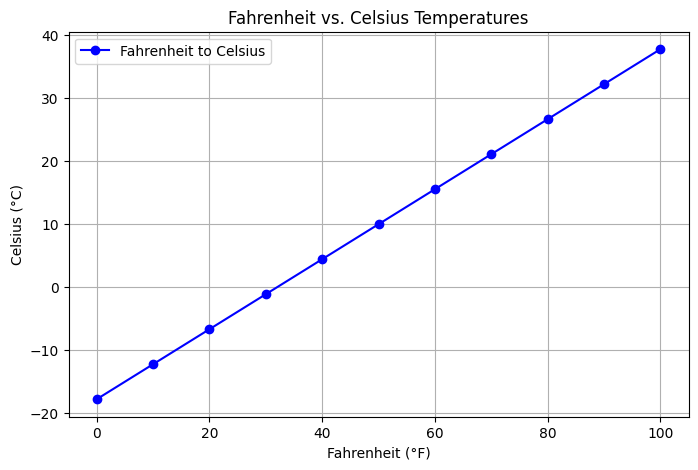

In [3]:
# Step 1: Define the lambda function for Fahrenheit to Celsius conversion
c = lambda f: 5 / 9 * (f - 32)

# Step 2: Generate the list of Fahrenheit to Celsius pairs (0 to 100 in increments of 10)
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Print out the Fahrenheit/Celsius pairs
print(temps)

# Step 3: Plot the Fahrenheit and Celsius temperatures

import matplotlib.pyplot as plt

# Extract Fahrenheit and Celsius values from the temps list of tuples
fahrenheit = [f for f, _ in temps]
celsius = [temp for _, temp in temps]

# Plotting the data
plt.figure(figsize=(8, 5))
plt.plot(fahrenheit, celsius, marker='o', linestyle='-', color='b', label='Fahrenheit to Celsius')
plt.title('Fahrenheit vs. Celsius Temperatures')
plt.xlabel('Fahrenheit (°F)')
plt.ylabel('Celsius (°C)')
plt.grid(True)
plt.legend()
plt.show()
